In [26]:
%pip install --quiet pandas pydub numpy matplotlib librosa seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, make_scorer, hinge_loss
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [28]:
features = pd.read_csv('../caracter_spy.csv')
classes = pd.read_csv('../class_spy.csv')

features

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,389,221,26,24,116,0,121,87,0,8
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,392,222,26,24,118,0,122,87,0,8
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,395,222,26,27,118,0,120,88,0,8
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,395,222,26,27,118,0,120,88,0,8
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,392,222,26,24,118,0,124,87,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20035,39,15,9.358974,0,171.589744,1271,32.589744,6436,195.030303,0,...,385,220,26,23,114,0,115,88,0,8
20036,38,15,9.736842,0,179.815789,1143,39.413793,6554,211.419355,0,...,378,219,26,21,110,0,113,57,0,8
20037,38,15,9.710526,0,180.078947,1143,39.413793,6561,211.645161,0,...,378,219,26,21,110,0,113,57,0,8
20038,38,15,9.578947,0,178.605263,923,34.185185,6501,209.709677,0,...,378,219,26,21,110,0,113,56,0,8


In [29]:
unnecessaryFeatures = [
    'pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.nprocs64bit','pslist.avg_handlers', 'dlllist.ndlls','handles.nhandles',
    'handles.nport','handles.nfile','handles.ndesktop','handles.nkey','handles.nthread',
    'handles.nsemaphore','handles.ntimer','handles.nsection','handles.nmutant','ldrmodules.not_in_load','ldrmodules.not_in_init','ldrmodules.not_in_mem',
    'ldrmodules.not_in_load_avg','ldrmodules.not_in_mem_avg','malfind.commitCharge','malfind.protection',
    'malfind.uniqueInjections','psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool',
    'psxview.not_in_csrss_handles','psxview.not_in_session','psxview.not_in_deskthrd','psxview.not_in_pslist_false_avg','psxview.not_in_eprocess_pool_false_avg',
    'psxview.not_in_ethread_pool_false_avg','psxview.not_in_pspcid_list_false_avg','psxview.not_in_csrss_handles_false_avg','psxview.not_in_session_false_avg',
    'psxview.not_in_deskthrd_false_avg','modules.nmodules','svcscan.kernel_drivers','svcscan.fs_drivers',
    'svcscan.shared_process_services','svcscan.interactive_process_services','svcscan.nactive','callbacks.nanonymous','callbacks.ngeneric', 'psxview.not_in_pspcid_list'
] 

# Attribute Selected 'svcscan.process_services', 'handles.nevent', 'svcscan.nservices', 'handles.avg_handles_per_proc','callbacks.ncallbacks','dlllist.avg_dlls_per_proc', 'malfind.ninjections', 'ldrmodules.not_in_init_avg', 'handles.ndirectory'

previsores = features.drop(unnecessaryFeatures, axis=1)

previsores

,dlllist.avg_dlls_per_proc,handles.avg_handles_per_proc,handles.nevent,handles.ndirectory,ldrmodules.not_in_init_avg,malfind.ninjections,svcscan.nservices,svcscan.process_services,callbacks.ncallbacks
0,38.500000,212.302326,3161,104,0.054441,5,389,24,87
1,44.127660,242.234043,3761,117,0.057774,12,392,24,87
2,48.300000,288.225000,3996,100,0.045571,5,395,27,88
3,45.156250,264.281250,2961,83,0.042966,2,395,27,88
4,49.214286,281.333333,3834,103,0.067042,12,392,24,87
...,...,...,...,...,...,...,...,...,...
20035,32.589744,195.030303,1972,83,0.143472,30,385,23,88
20036,39.413793,211.419355,2018,81,0.135417,11,378,21,57
20037,39.413793,211.645161,2022,81,0.115538,11,378,21,57
20038,34.185185,209.709677,1997,81,0.120968,9,378,21,56


In [30]:
feature_train, feature_test, class_train, class_test = train_test_split(previsores, classes, test_size=0.20)

In [31]:
import time
import timeit

def inference_time_unit_vs_batch(model, model_name, type, features_unit, features_block):

    names = []
    times = []

    features_unit_length = len(features_unit)
    features_block_length = len(features_block)

    if (features_unit_length != features_block_length):
        print("unit and block features lenght must be equal")
        return
    
    if (features_unit_length == 0 or features_block_length == 0):
        print("Is not possible to calculate inference time for empty features list.")
        return
    
    def predict_batch():
        model.predict(features_block)
    
    total_time_unit = 0
    index = 0
    while index < features_unit_length - 1:
        init_time = time.perf_counter()
        model.predict(features_unit.iloc[[index]])
        end_time = time.perf_counter()
        unit_time = end_time - init_time
        total_time_unit += unit_time
        index+=1
    
    names.append("tempo de execução 1 a 1")
    avg_time_unit = total_time_unit/features_unit_length
    times.append(avg_time_unit)

    names.append("tempo de execução em bloco") 
    total_time_batch = timeit.timeit(predict_batch, number=100)
    avg_time_batch = total_time_batch / 100
    times.append(avg_time_batch)

    plt.figure(figsize=(10, 5))
    plt.bar(names, times, color=['royalblue', 'tomato'])
    plt.title(f"Desempenho Unitário (Exemplo a Exemplo) para {'Exemplo Benigno' if type == 0 else 'Exemplo Spyware'} ({model_name})")
    plt.ylabel("Tempo médio por amostra (s)")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    for i in range(len(names)):
        plt.text(i, times[i], f'{times[i]:.6f}', ha='center', va='bottom', fontsize=10)
    
    plt.savefig(f"sample_by_sample_{'benign' if type == 0 else 'spyware'}_{model_name}.png")
    plt.show()
    
    return



def inference_time_diff_block_length(model, model_name, type, features_100, features_200, features_300):

    names = []
    times = []

    if (len(features_100) == 0 or len(features_200) == 0 or len(features_300) == 0):
        print("Is not possible to calculate inference time for empty features list.")
        return
    
    def predict_batch_100():
        model.predict(features_100)

    def predict_batch_200():
        model.predict(features_200)

    def predict_batch_300():
        model.predict(features_300)
    
    names.append("tempo de execução em bloco para 100") 
    total_time_batch_100 = timeit.timeit(predict_batch_100, number=100)
    avg_time_batch_100 = total_time_batch_100 / 100
    times.append(avg_time_batch_100)

    names.append("tempo de execução em bloco para 200") 
    total_time_batch_200 = timeit.timeit(predict_batch_200, number=200)
    avg_time_batch_200 = total_time_batch_200 / 200
    times.append(avg_time_batch_200)

    names.append("tempo de execução em bloco para 300") 
    total_time_batch_300 = timeit.timeit(predict_batch_300, number=300)
    avg_time_batch_300 = total_time_batch_300 / 300
    times.append(avg_time_batch_300)

    plt.figure(figsize=(10, 5))
    plt.bar(names, times, color=['royalblue', 'tomato', 'mediumseagreen'])
    
    plt.title(f"Desempenho em lote (Exemplo a Exemplo) para {'Exemplo Benigno' if type == 0 else 'Exemplo Spyware'} ({model_name})")
    plt.ylabel("Tempo médio por amostra (s)")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    for i in range(len(names)):
        plt.text(i, times[i], f'{times[i]:.6f}', ha='center', va='bottom', fontsize=10)

    plt.savefig(f"diff_batch_size_{'benign' if type == 0 else 'spyware'}_{model_name}.png")
    plt.show()
    
    return


benignUnit = feature_test.iloc[:100]
spywareUnit = feature_test.iloc[-100:]

benignBlock = feature_test.iloc[701:801]
spywareBlock = feature_test.iloc[-801:-701]

benignBlock100 = feature_test.iloc[101:201]
spywareBlock100 = feature_test.iloc[-201:-101]

benignBlock200 = feature_test.iloc[201:401]
spywareBlock200 = feature_test.iloc[-401:-201]

benignBlock300 = feature_test.iloc[401:701]
spywareBlock300 = feature_test.iloc[-701:-401]

# Rede Neural

In [7]:
classifier = Sequential()

In [8]:
scaler = StandardScaler()
previsor_train_normalized = scaler.fit_transform(feature_train)

In [9]:
optmizer_ = Adam(learning_rate=0.001)

In [10]:
classifier.add(Dense(units=15, activation='relu', kernel_initializer='random_uniform',input_dim=9))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=15, activation='relu', kernel_initializer='random_uniform'))
classifier.add(Dense(units=8, activation='relu', kernel_initializer='random_uniform'))
classifier.add(Dense(units=1, activation='sigmoid'))
classifier.compile(optimizer=optmizer_, loss="binary_crossentropy", metrics=['binary_accuracy'])
classifier.fit(feature_train, class_train, batch_size=10, epochs=100)

c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - binary_accuracy: 0.8505 - loss: 0.2800
Epoch 2/100
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.9809 - loss: 0.0672
Epoch 3/100
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - binary_accuracy: 0.9834 - loss: 0.0549
Epoch 4/100
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - binary_accuracy: 0.9858 - loss: 0.0496
Epoch 5/100
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.9854 - loss: 0.0502
Epoch 6/100
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.9836 - loss: 0.0536
Epoch 7/100
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.9882 - loss: 0.0413
Epoch 8/100
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.9872 - loss: 0.0403
Epoch 9/100
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.9876 - loss: 0.0442
Epoch 10/100
1604/1604 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - binary_accuracy: 0.9826 - loss: 0.0560
Epoch 11/100
1604/1604 ━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
predictions = classifier.predict(feature_test)
predictions = (predictions > 0.5)
predictions

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
precision = accuracy_score(class_test, predictions)
precision

0.9887724550898204

In [ ]:
print( classification_report(class_test, predictions))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1998
           1       0.98      1.00      0.99      2010

    accuracy                           0.99      4008
   macro avg       0.99      0.99      0.99      4008
weighted avg       0.99      0.99      0.99      4008



Epoch 1/100
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - binary_accuracy: 0.9835 - loss: 0.0396 - val_binary_accuracy: 0.9916 - val_loss: 0.0349
Epoch 2/100
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.9853 - loss: 0.0398 - val_binary_accuracy: 0.9916 - val_loss: 0.0321
Epoch 3/100
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - binary_accuracy: 0.9849 - loss: 0.0407 - val_binary_accuracy: 0.9913 - val_loss: 0.0289
Epoch 4/100
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.9844 - loss: 0.0461 - val_binary_accuracy: 0.9906 - val_loss: 0.0300
Epoch 5/100
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - binary_accuracy: 0.9853 - loss: 0.0452 - val_binary_accuracy: 0.9916 - val_loss: 0.0333
Epoch 6/100
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.9878 - loss: 0.0354 - val_binary_accuracy: 0.9913 - val_loss: 0.0312
Epoch 7/100
1283/1283 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - binary_accuracy: 0.9900 - loss: 0.0365 - val_binary_accuracy: 0.9910 - va

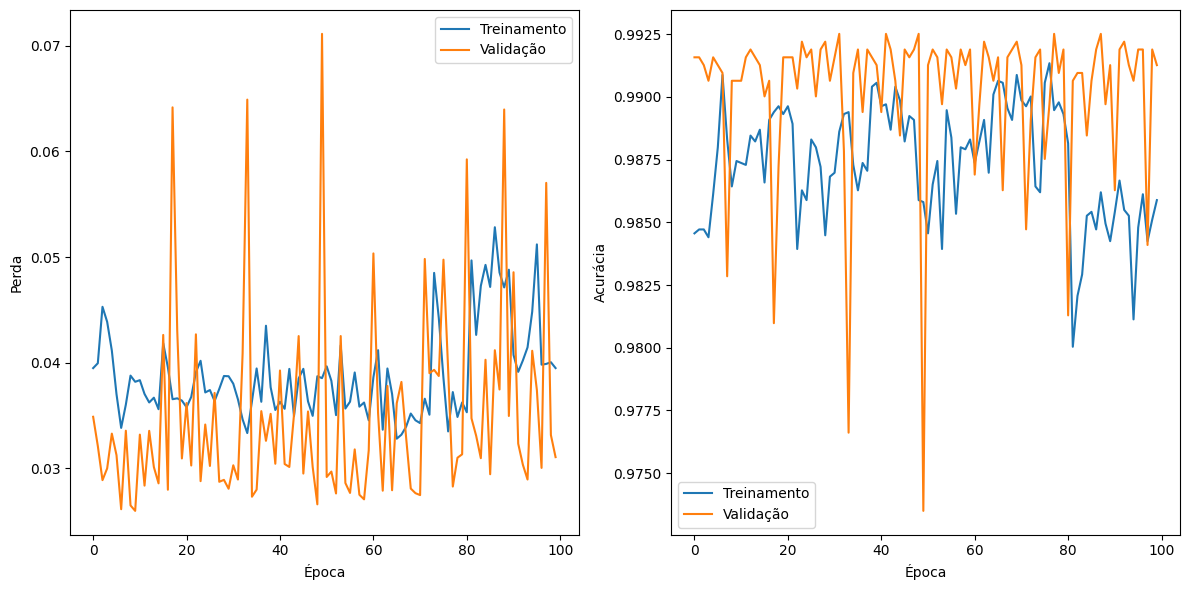

In [ ]:
history = classifier.fit(feature_train, class_train, batch_size=10, epochs=100, validation_split=0.2)

train_loss = history.history['loss']
train_accuracy = history.history['binary_accuracy']

if 'val_loss' in history.history and 'val_binary_accuracy' in history.history:
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_binary_accuracy']


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Treinamento')
if 'val_loss' in history.history:
    plt.plot(val_loss, label='Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(loc="best")
plt.savefig('lossRNA-OM.png')


plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Treinamento')
if 'val_binary_accuracy' in history.history:
    plt.plot(val_accuracy, label='Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(loc="best")
plt.savefig('accuracyRNA-OM.png')

plt.tight_layout()
plt.show()

In [ ]:
predictions = classifier.predict(feature_test)
predictions = (predictions > 0.5)
predictions

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
precision = accuracy_score(class_test, predictions)
precision

0.9922654690618763

In [ ]:
matriz = confusion_matrix(class_test, predictions)

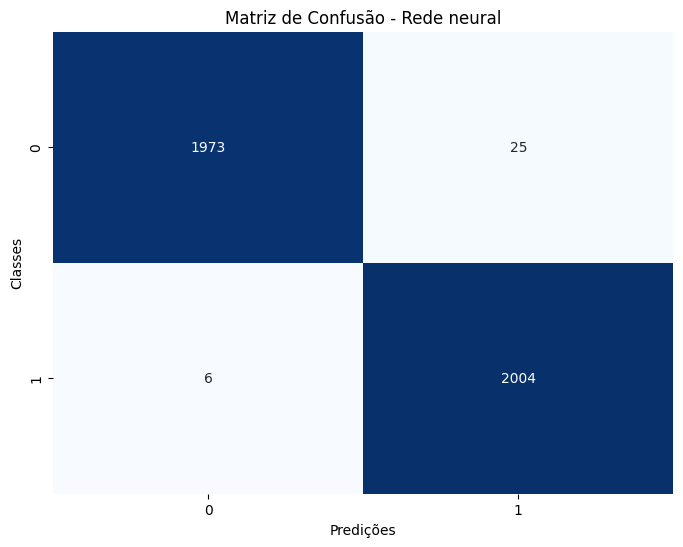

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predições')
plt.ylabel('Classes')
plt.title('Matriz de Confusão - Rede neural')
plt.savefig('matrizRNA-OM.png')
plt.show()


In [ ]:
num_folds = 5

kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

acuracias = []

for fold, (train_index, test_index) in enumerate(kf.split(feature_train, class_train)):
    print(f"\nFold {fold + 1}/{num_folds}")

    train_index = list(train_index)
    test_index = list(test_index)


    feature_train_fold, feature_test_fold = feature_train.iloc[train_index], feature_train.iloc[test_index]
    class_train_fold, class_test_fold = class_train.iloc[train_index], class_train.iloc[test_index]

    classifier.fit(feature_train_fold, class_train_fold, batch_size=10, epochs=100, verbose=0)

    previsoes_teste = (classifier.predict(feature_test_fold) > 0.5).astype(int)

    acuracia = accuracy_score(class_test_fold, previsoes_teste)
    acuracias.append(acuracia)


    print(f'Acurácia da rede neural no Fold {fold + 1}: {acuracia}')

media_acuracias = np.mean(acuracias)
print(f"\nMédia das Acurácias: {media_acuracias}")


Fold 1/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Acurácia da rede neural no Fold 1: 0.9909572809479265

Fold 2/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Acurácia da rede neural no Fold 2: 0.9940754599314

Fold 3/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Acurácia da rede neural no Fold 3: 0.991890205864005

Fold 4/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Acurácia da rede neural no Fold 4: 0.9766063630692452

Fold 5/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Acurácia da rede neural no Fold 5: 0.991890205864005

Média das Acurácias: 0.9890839031353164


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━

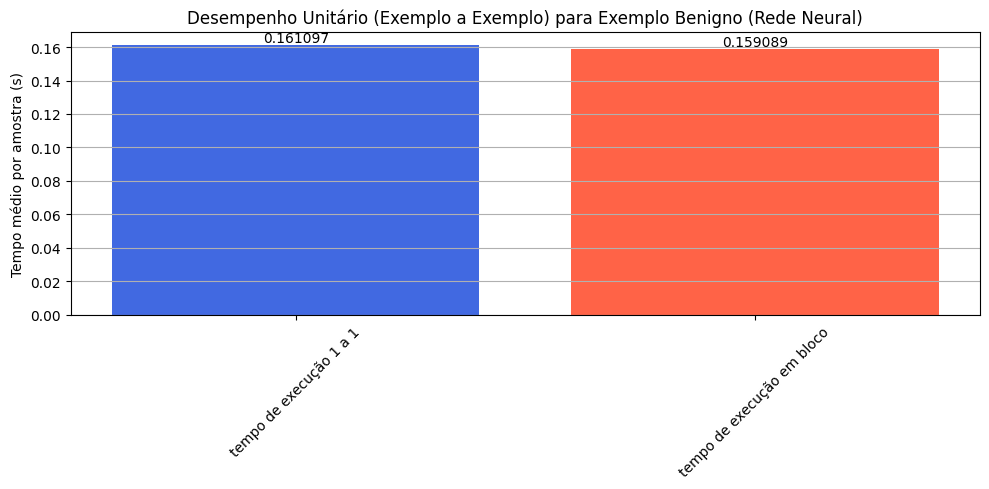

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━

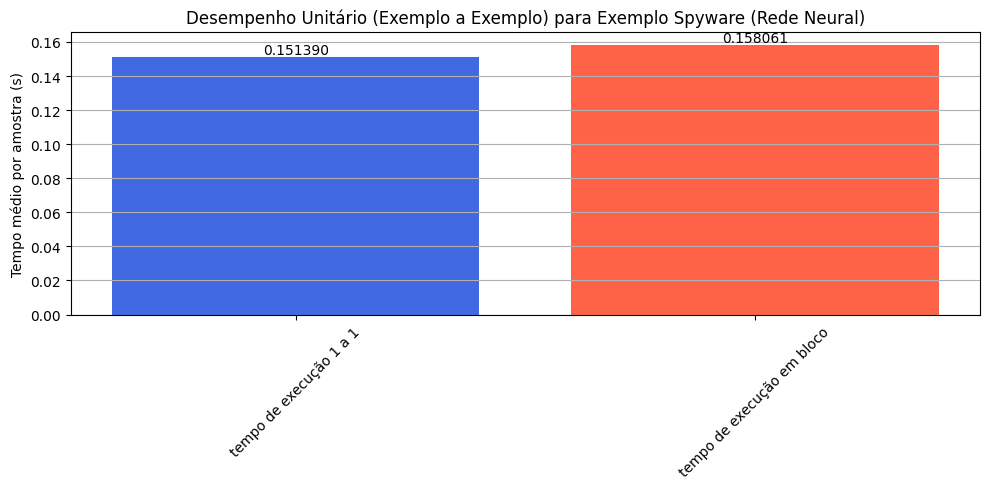

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━

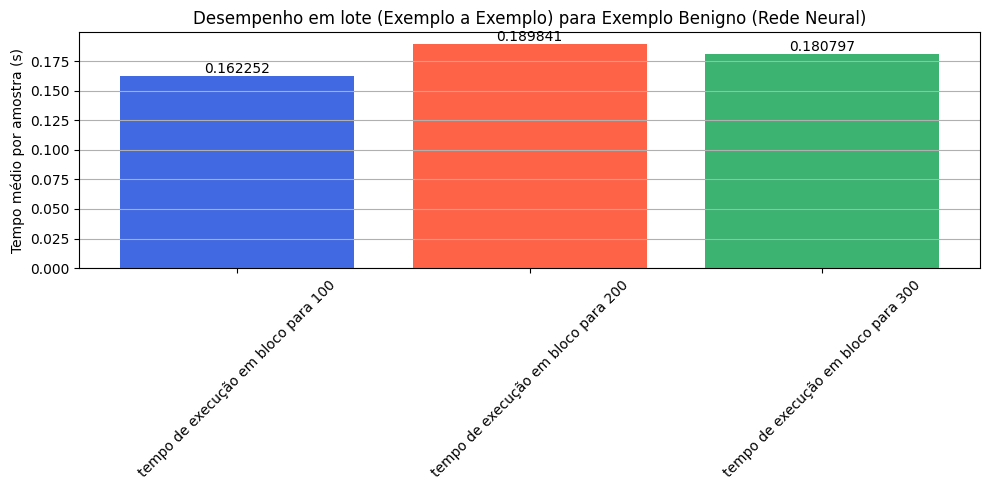

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━

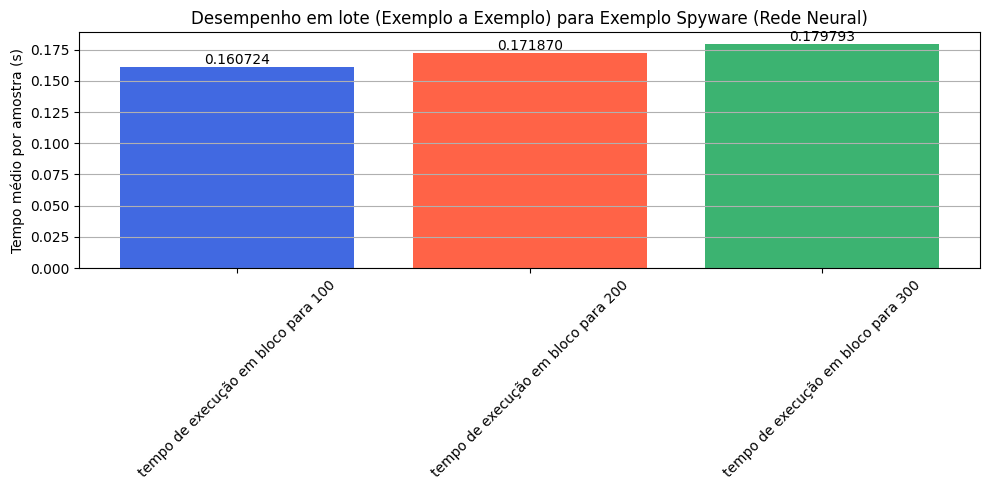

In [ ]:
inference_time_unit_vs_batch(classifier, "Rede Neural", 0, benignUnit, benignBlock)
inference_time_unit_vs_batch(classifier, "Rede Neural", 1, spywareUnit, spywareBlock)

inference_time_diff_block_length(classifier, "Rede Neural", 0, benignBlock100, benignBlock200, benignBlock300)
inference_time_diff_block_length(classifier, "Rede Neural", 1, spywareBlock100, spywareBlock200, spywareBlock300)

# Árvore de decisão

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(feature_train, class_train)

DecisionTreeClassifier()

In [ ]:
prediction_DT = decision_tree.predict(feature_test)

In [ ]:
accuracy_DT = accuracy_score(class_test, prediction_DT)
print(f'Acurácia da árvore de decisão:{accuracy_DT}')

Acurácia da árvore de decisão:1.0


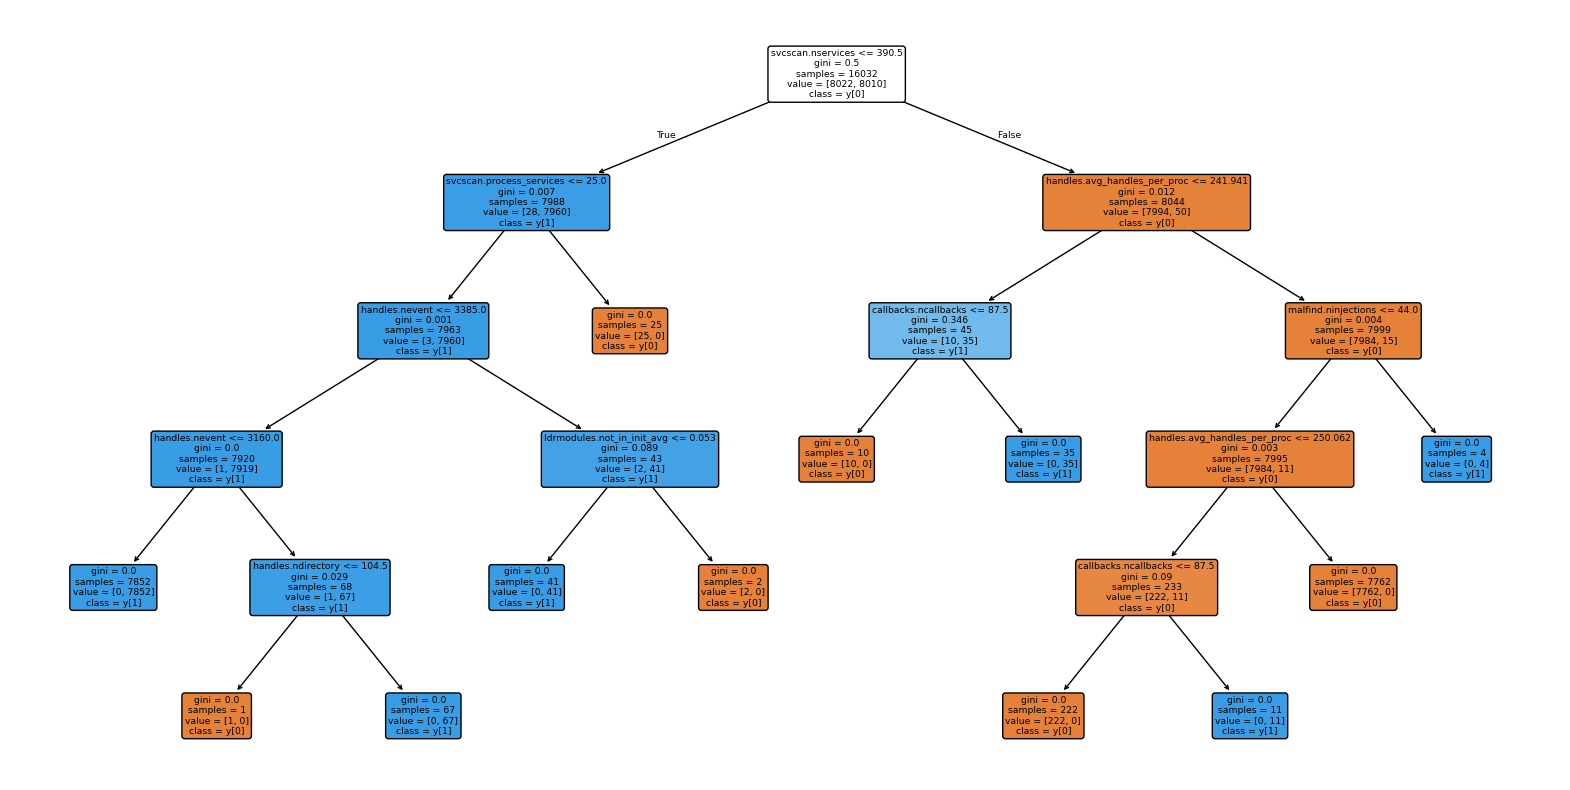

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=feature_train.columns, class_names=True, rounded=True)
plt.savefig('generateTree-OM.png')
plt.show()

In [ ]:
tree_rules = export_text(decision_tree, feature_names=feature_train.columns.tolist())
print(tree_rules)

|--- svcscan.nservices <= 390.50
|   |--- svcscan.process_services <= 25.00
|   |   |--- handles.nevent <= 3385.00
|   |   |   |--- handles.nevent <= 3160.00
|   |   |   |   |--- class: 1
|   |   |   |--- handles.nevent >  3160.00
|   |   |   |   |--- handles.ndirectory <= 104.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- handles.ndirectory >  104.50
|   |   |   |   |   |--- class: 1
|   |   |--- handles.nevent >  3385.00
|   |   |   |--- ldrmodules.not_in_init_avg <= 0.05
|   |   |   |   |--- class: 1
|   |   |   |--- ldrmodules.not_in_init_avg >  0.05
|   |   |   |   |--- class: 0
|   |--- svcscan.process_services >  25.00
|   |   |--- class: 0
|--- svcscan.nservices >  390.50
|   |--- handles.avg_handles_per_proc <= 241.94
|   |   |--- callbacks.ncallbacks <= 87.50
|   |   |   |--- class: 0
|   |   |--- callbacks.ncallbacks >  87.50
|   |   |   |--- class: 1
|   |--- handles.avg_handles_per_proc >  241.94
|   |   |--- malfind.ninjections <= 44.00
|   |   |   |--- handles

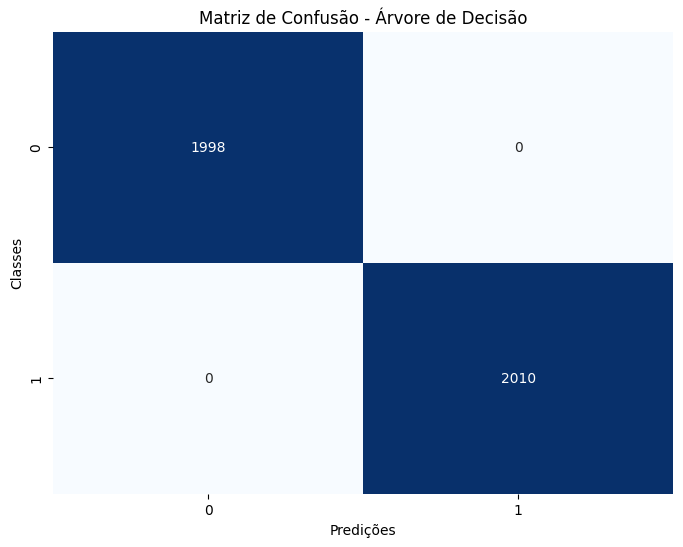

In [ ]:
matriz_DT = confusion_matrix(class_test, prediction_DT)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_DT, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predições')
plt.ylabel('Classes')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.savefig('matrizdeconfusaoDT-OM.png')
plt.show()

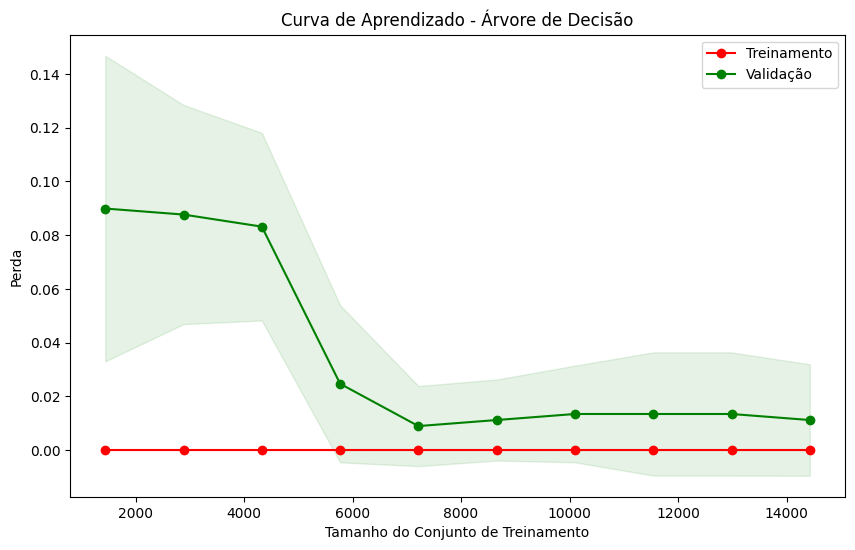

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(decision_tree, feature_train, class_train, cv=10, scoring='neg_log_loss', train_sizes=np.linspace(0.1, 1.0, 10))


train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Perda")
plt.legend(loc="best")
plt.title("Curva de Aprendizado - Árvore de Decisão")
plt.savefig('LossDT-OM.png')
plt.show()

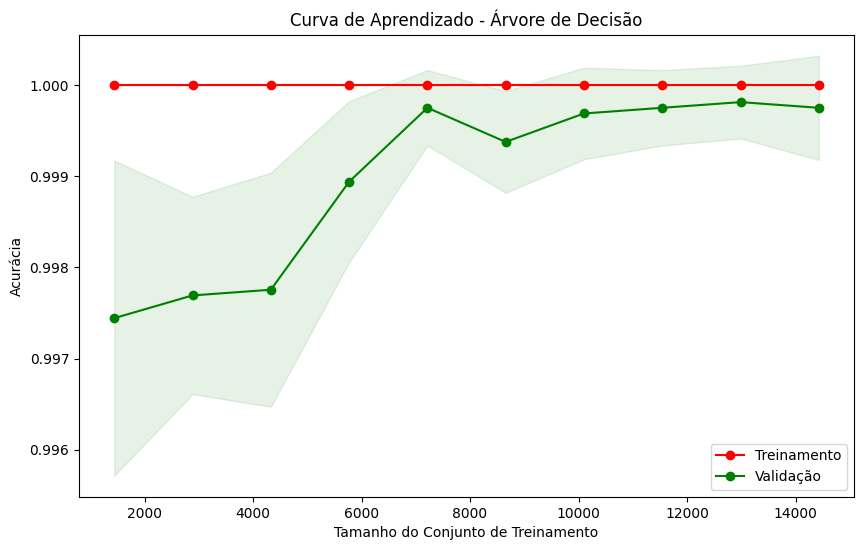

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(decision_tree, feature_train, class_train, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Acurácia")
plt.legend(loc="best")
plt.title("Curva de Aprendizado - Árvore de Decisão")
plt.savefig('acurracyDT-OM.png')
plt.show()

 K-Fold

In [ ]:
num_folds = 5

kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

acuracias = []

for fold, (train_index, test_index) in enumerate(kf.split(feature_train, class_train)):
    print(f"\nFold {fold + 1}/{num_folds}")

    train_index = list(train_index)
    test_index = list(test_index)

    feature_train_fold, feature_test_fold = feature_train.iloc[train_index], feature_train.iloc[test_index]
    class_train_fold, class_test_fold = class_train.iloc[train_index], class_train.iloc[test_index]


    decision_tree.fit(feature_train_fold, class_train_fold)

    prediction_DT = decision_tree.predict(feature_test_fold)

    acuracia = accuracy_score(class_test_fold, prediction_DT)
    acuracias.append(acuracia)

    print(f'Acurácia da Árvore de Decisão no Fold {fold + 1}: {acuracia}')

media_acuracias = np.mean(acuracias)
print(f"\nMédia das Acurácias: {media_acuracias}")


Fold 1/5
Acurácia da Árvore de Decisão no Fold 1: 0.9993763642033052

Fold 2/5
Acurácia da Árvore de Decisão no Fold 2: 1.0

Fold 3/5
Acurácia da Árvore de Decisão no Fold 3: 0.9993761696818465

Fold 4/5
Acurácia da Árvore de Decisão no Fold 4: 0.9996880848409233

Fold 5/5
Acurácia da Árvore de Decisão no Fold 5: 0.9993761696818465

Média das Acurácias: 0.9995633576815843


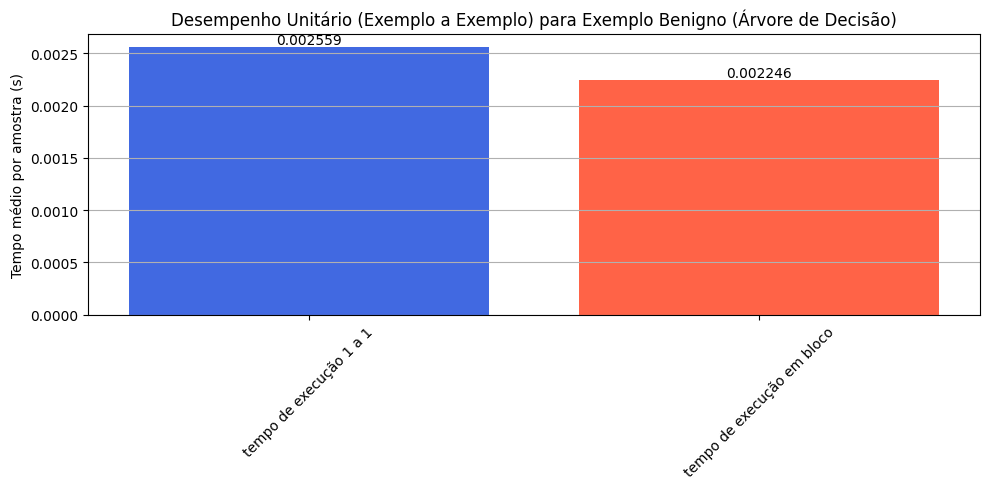

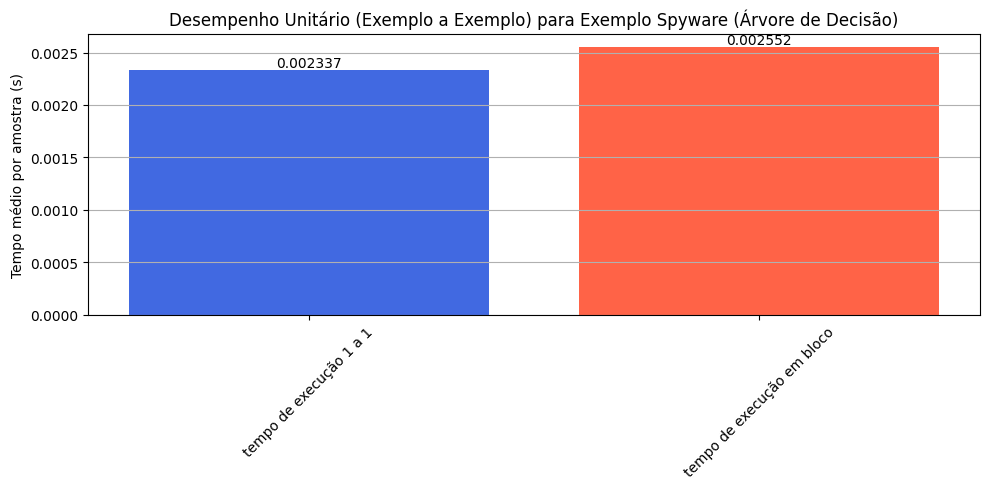

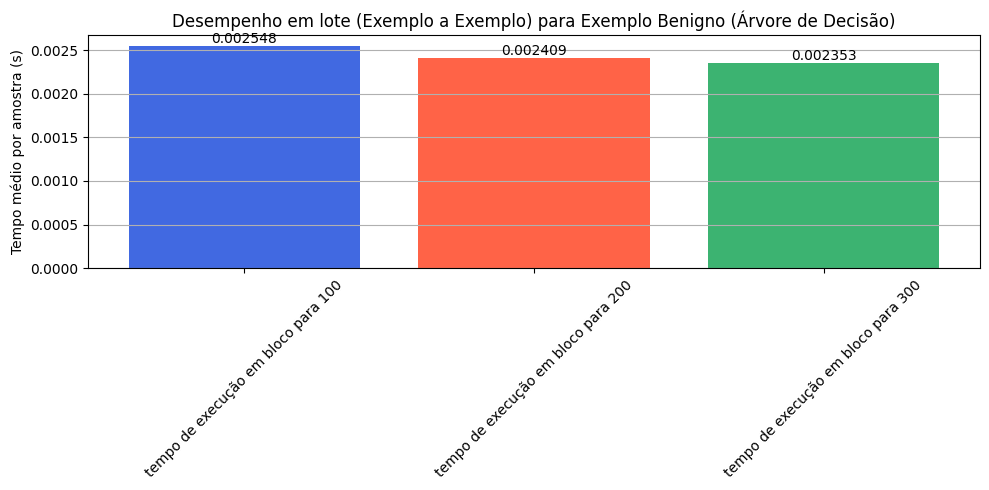

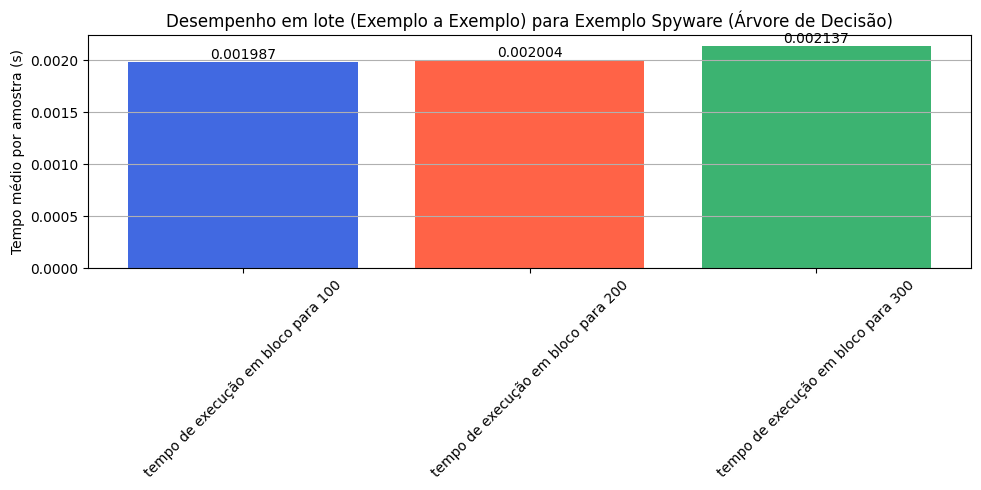

In [ ]:
inference_time_unit_vs_batch(decision_tree, "Árvore de Decisão", 0, benignUnit, benignBlock)
inference_time_unit_vs_batch(decision_tree, "Árvore de Decisão", 1, spywareUnit, spywareBlock)

inference_time_diff_block_length(decision_tree, "Árvore de Decisão", 0, benignBlock100, benignBlock200, benignBlock300)
inference_time_diff_block_length(decision_tree, "Árvore de Decisão", 1, spywareBlock100, spywareBlock200, spywareBlock300)

# Naive Bayes

In [7]:
naive_bayes = GaussianNB()
naive_bayes.fit(feature_train, class_train)

c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [8]:
prediction_NB = naive_bayes.predict(feature_test)

In [9]:
accuracyNB = accuracy_score(class_test, prediction_NB)
print(f'Acurácia Naive Bayes:{accuracyNB}')

Acurácia Naive Bayes:0.9932634730538922


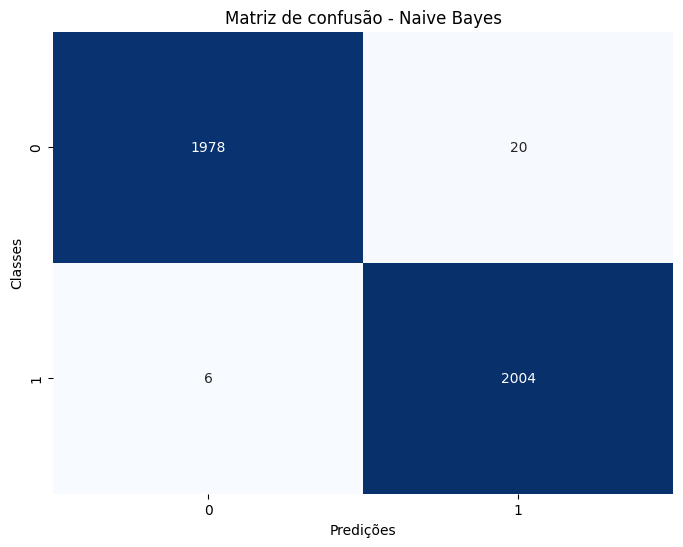

In [ ]:
matriz_NB = confusion_matrix(class_test, prediction_NB)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_NB, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predições')
plt.ylabel('Classes')
plt.title('Matriz de confusão - Naive Bayes')
plt.savefig('matrizdeconfusaoNB-OM.png')
plt.show()

c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataC

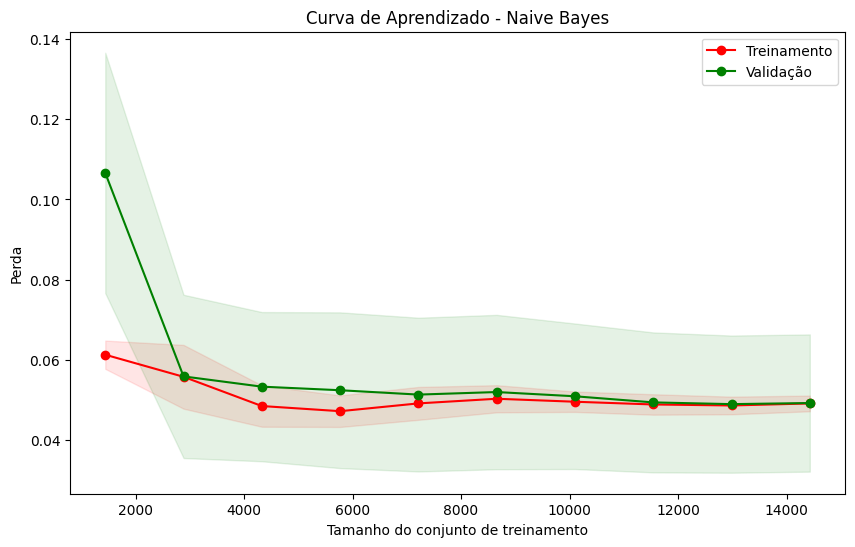

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(naive_bayes, feature_train, class_train, cv=10, scoring='neg_log_loss', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação")
plt.xlabel("Tamanho do conjunto de treinamento")
plt.ylabel("Perda")
plt.legend(loc="best")
plt.title("Curva de Aprendizado - Naive Bayes")
plt.savefig('LossNB-OM.png')
plt.show()

c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataC

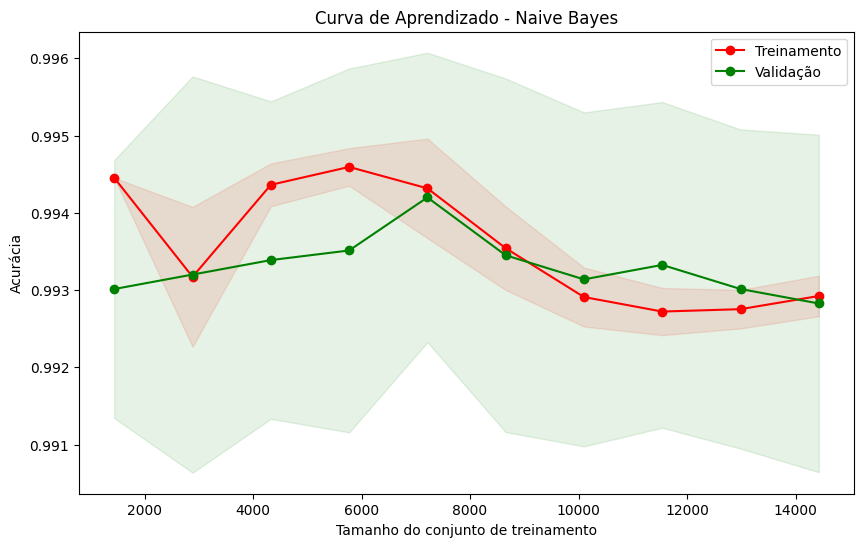

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(naive_bayes, feature_train, class_train, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação")
plt.xlabel("Tamanho do conjunto de treinamento")
plt.ylabel("Acurácia")
plt.legend(loc="best")
plt.title("Curva de Aprendizado - Naive Bayes")
plt.savefig('acuraciaNB-OM.png')
plt.show()

In [ ]:
num_folds = 5

kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)


acuracias = []


for fold, (train_index, test_index) in enumerate(kf.split(feature_train, class_train)):
    print(f"\nFold {fold + 1}/{num_folds}")


    train_index = list(train_index)
    test_index = list(test_index)


    feature_train_fold, feature_test_fold = feature_train.iloc[train_index], feature_train.iloc[test_index]
    class_train_fold, class_test_fold = class_train.iloc[train_index], class_train.iloc[test_index]


    naive_bayes.fit(feature_train_fold, class_train_fold.values.ravel())


    prediction_NB = naive_bayes.predict(feature_test_fold)

    acuracia = accuracy_score(class_test_fold, prediction_NB)
    acuracias.append(acuracia)

    print(f'Acurácia do Naive Bayes no Fold {fold + 1}: {acuracia}')

media_acuracias = np.mean(acuracias)
print(f"\nMédia das Acurácias: {media_acuracias}")


Fold 1/5
Acurácia do Naive Bayes no Fold 1: 0.9937636420330527

Fold 2/5
Acurácia do Naive Bayes no Fold 2: 0.9940754599314

Fold 3/5
Acurácia do Naive Bayes no Fold 3: 0.9928259513412352

Fold 4/5
Acurácia do Naive Bayes no Fold 4: 0.9928259513412352

Fold 5/5
Acurácia do Naive Bayes no Fold 5: 0.9915782907049283

Média das Acurácias: 0.9930138590703702


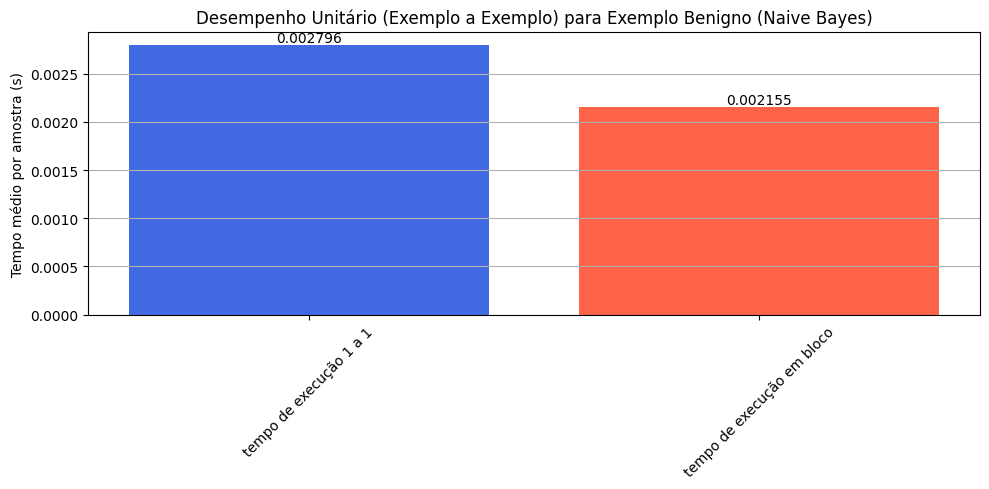

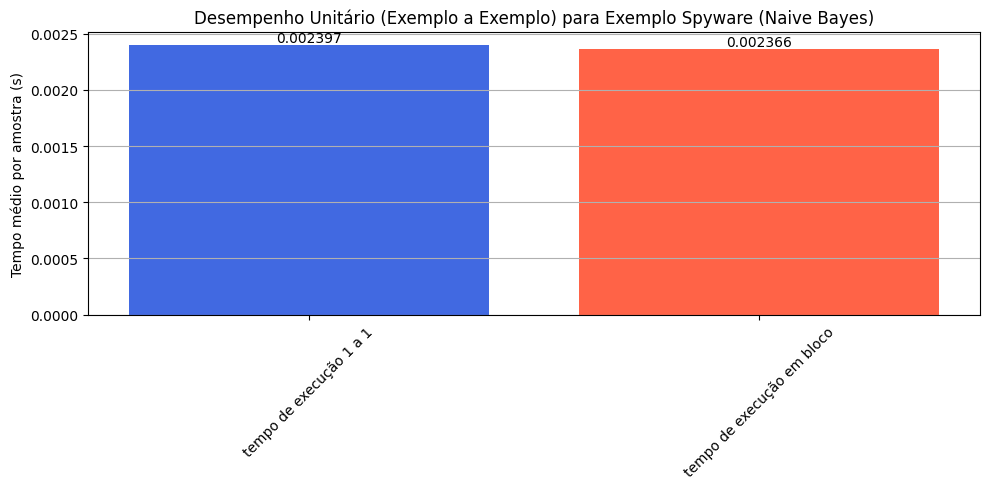

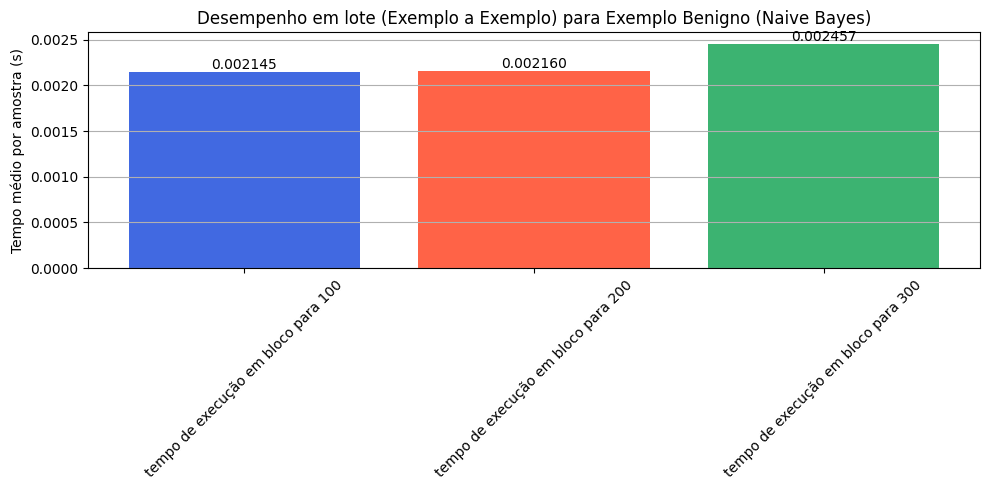

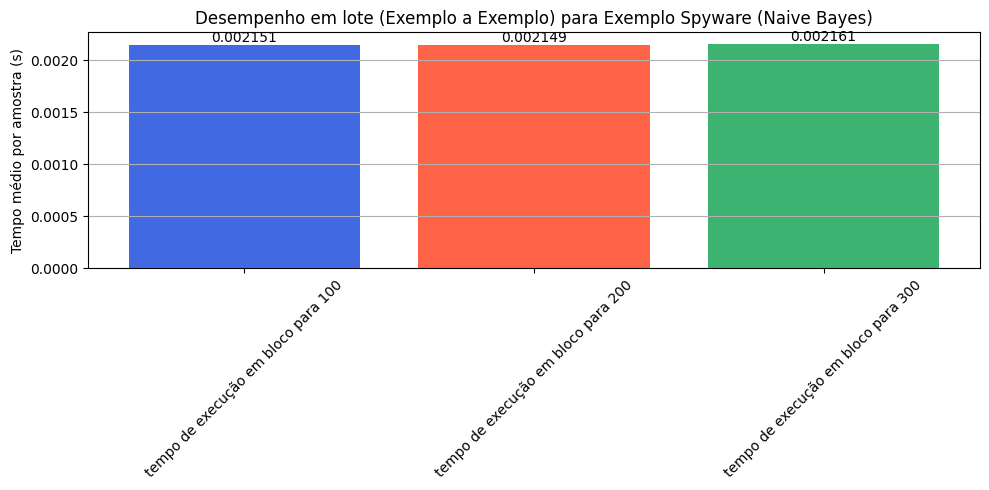

In [ ]:
inference_time_unit_vs_batch(naive_bayes, "Naive Bayes", 0, benignUnit, benignBlock)
inference_time_unit_vs_batch(naive_bayes, "Naive Bayes", 1, spywareUnit, spywareBlock)

inference_time_diff_block_length(naive_bayes, "Naive Bayes", 0, benignBlock100, benignBlock200, benignBlock300)
inference_time_diff_block_length(naive_bayes, "Naive Bayes", 1, spywareBlock100, spywareBlock200, spywareBlock300)

# SVM

In [32]:
svm = SVC(kernel='linear', random_state=1, C=0.1)
svm.fit(feature_train, class_train)

c:\Users\m31al\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, kernel='linear', random_state=1)

In [33]:
predictions_svm = svm.predict(feature_test)

In [34]:
accuracy_svm = accuracy_score(class_test, predictions_svm)
print(f'Acurácia SVM:{accuracy_svm}')

Acurácia SVM:0.9965069860279441


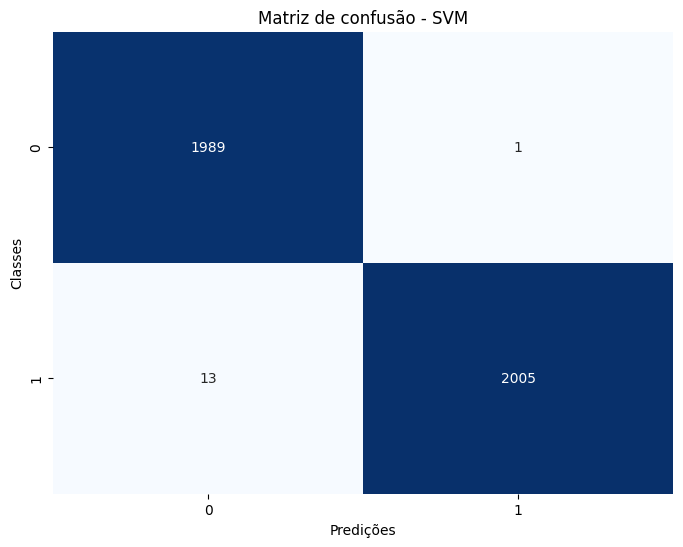

In [35]:
matriz_svm = confusion_matrix(class_test, predictions_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predições')
plt.ylabel('Classes')
plt.title('Matriz de confusão - SVM')
plt.savefig('matrizdeconusaoSVM-OM.png')
plt.show()

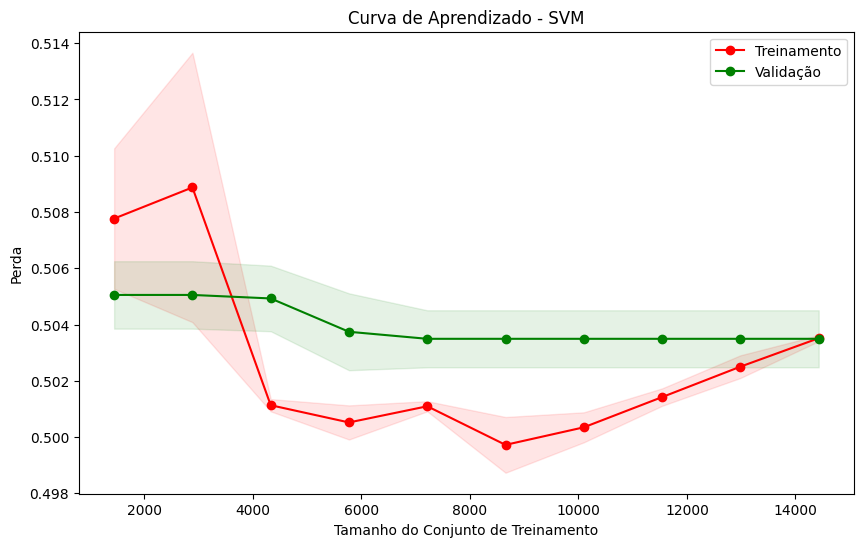

In [36]:
hinge_loss_scorer = make_scorer(hinge_loss, greater_is_better=False)
train_sizes, train_scores, test_scores = learning_curve(svm, feature_train, class_train, cv=10, scoring=hinge_loss_scorer, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=16)


train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Perda")
plt.legend(loc="best")
plt.title("Curva de Aprendizado - SVM")
plt.savefig('LossSVM-OM.png')
plt.show()

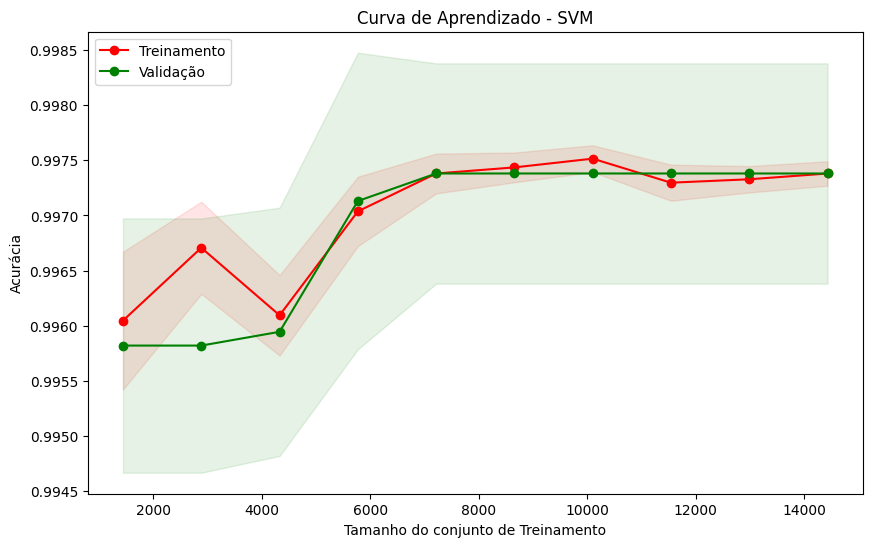

In [37]:
train_sizes, train_scores, test_scores = learning_curve(svm, feature_train, class_train, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=16)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação")
plt.xlabel("Tamanho do conjunto de Treinamento")
plt.ylabel("Acurácia")
plt.legend(loc="best")
plt.title("Curva de Aprendizado - SVM")
plt.savefig('acuraciaSVM-OM.png')
plt.show()

In [38]:
num_folds = 5


kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

acuracias = []


for fold, (train_index, test_index) in enumerate(kf.split(feature_train, class_train)):
    print(f"\nFold {fold + 1}/{num_folds}")


    train_index = list(train_index)
    test_index = list(test_index)


    feature_train_fold, feature_test_fold = feature_train.iloc[train_index], feature_train.iloc[test_index]
    class_train_fold, class_test_fold = class_train.iloc[train_index], class_train.iloc[test_index]


    svm.fit(feature_train_fold, class_train_fold.values.ravel())


    predictions_svm = svm.predict(feature_test_fold)


    acuracia = accuracy_score(class_test_fold, predictions_svm)
    acuracias.append(acuracia)


    print(f'Acurácia do SVM no Fold {fold + 1}: {acuracia}')


media_acuracias = np.mean(acuracias)
print(f"\nMédia das Acurácias: {media_acuracias}")


Fold 1/5
Acurácia do SVM no Fold 1: 0.9975054568132211

Fold 2/5
Acurácia do SVM no Fold 2: 0.9975054568132211

Fold 3/5
Acurácia do SVM no Fold 3: 0.9971927635683094

Fold 4/5
Acurácia do SVM no Fold 4: 0.9981285090455396

Fold 5/5
Acurácia do SVM no Fold 5: 0.9965689332501559

Média das Acurácias: 0.9973802238980894


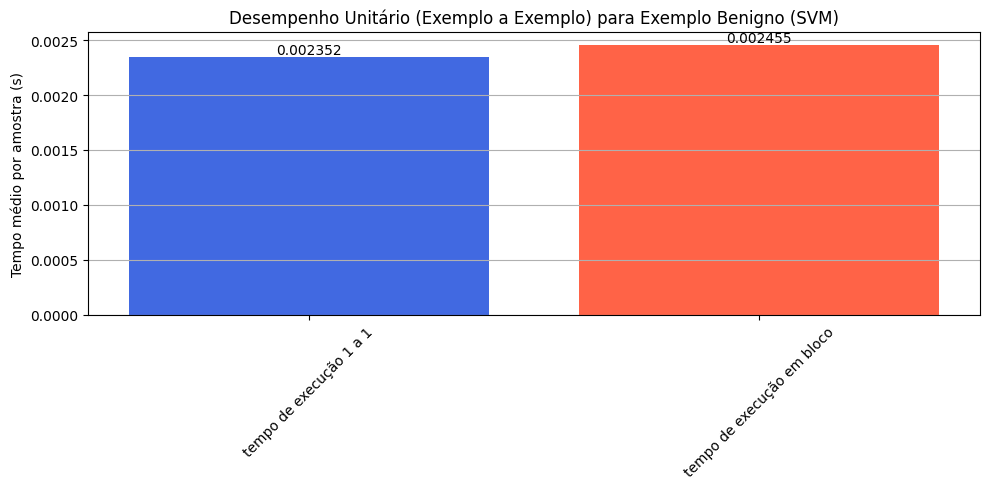

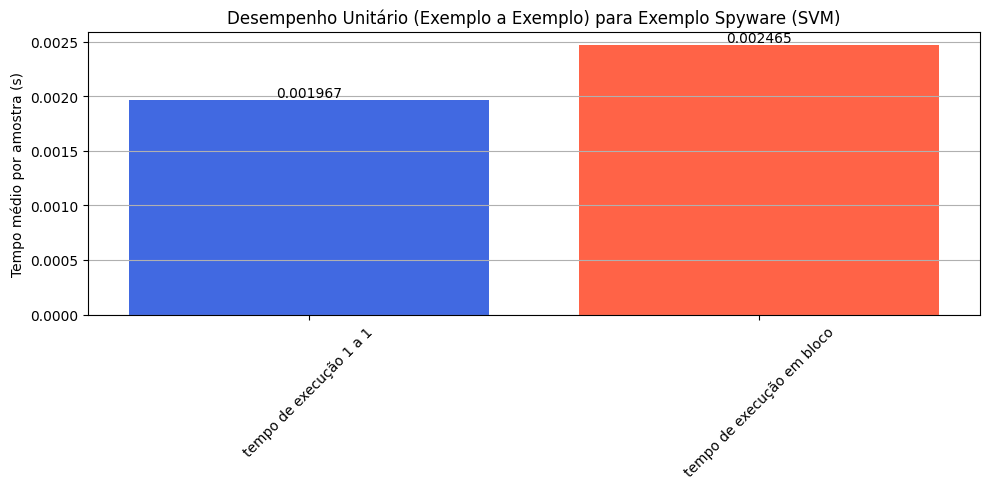

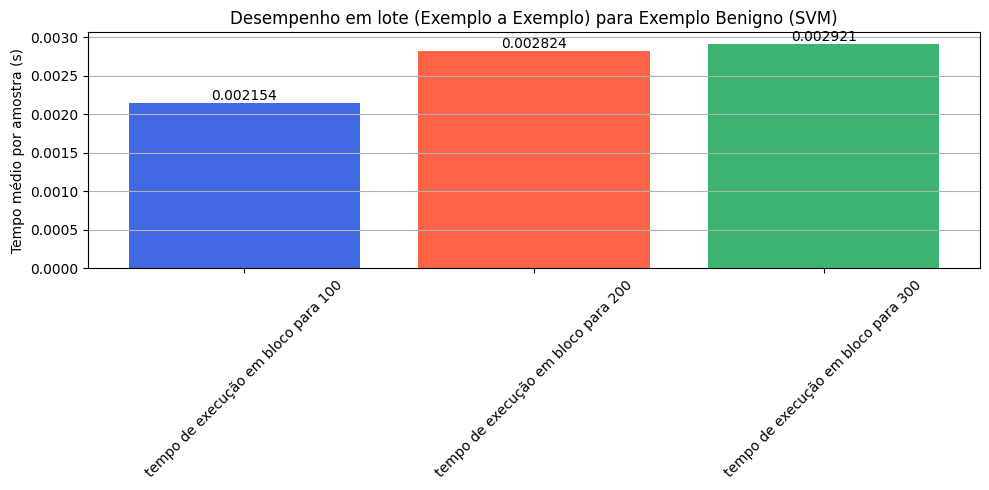

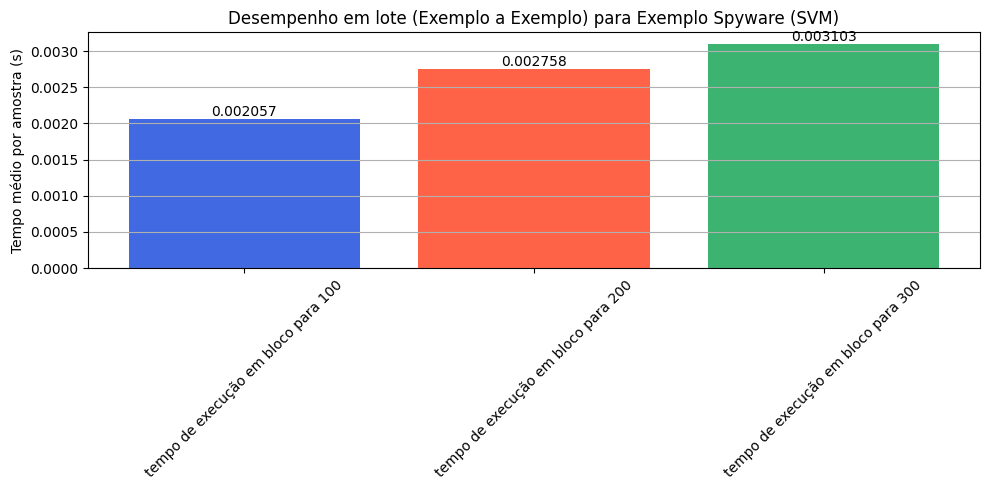

In [39]:
inference_time_unit_vs_batch(svm, "SVM", 0, benignUnit, benignBlock)
inference_time_unit_vs_batch(svm, "SVM", 1, spywareUnit, spywareBlock)

inference_time_diff_block_length(svm, "SVM", 0, benignBlock100, benignBlock200, benignBlock300)
inference_time_diff_block_length(svm, "SVM", 1, spywareBlock100, spywareBlock200, spywareBlock300)